In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
p_train = pd.read_csv(os.path.join(datadir, 'p.train.csv'))
p_test = pd.read_csv(os.path.join(datadir, 'p.test.csv'))
p_2022 = pd.read_csv(os.path.join(datadir, 'p.20230101.csv'))
s_train = pd.read_csv(os.path.join(datadir, 's.train.csv'))
s_test = pd.read_csv(os.path.join(datadir, 's.test.csv'))
s_2022 = pd.read_csv(os.path.join(datadir, 's.20230101.csv'))

In [4]:
p_train.columns

Index(['event_identifier', 'arrival_identifier', 'network', 'station',
       'channel', 'location_code', 'source_latitude', 'source_longitude',
       'source_receiver_distance_km', 'source_receiver_back_azimuth',
       'source_depth_km', 'noise_variance', 'noise_minimum_value',
       'noise_maximum_value', 'signal_variance', 'signal_minimum_value',
       'signal_maximum_value', 'noise_dominant_frequency',
       'noise_dominant_amplitude', 'signal_dominant_frequency',
       'signal_dominant_amplitude', 'magnitude_type', 'magnitude',
       'avg_noise_1.00', 'avg_signal_1.00', 'avg_noise_2.00',
       'avg_signal_2.00', 'avg_noise_3.00', 'avg_signal_3.00',
       'avg_noise_4.00', 'avg_signal_4.00', 'avg_noise_5.00',
       'avg_signal_5.00', 'avg_noise_6.00', 'avg_signal_6.00',
       'avg_noise_7.00', 'avg_signal_7.00', 'avg_noise_8.00',
       'avg_signal_8.00', 'avg_noise_9.00', 'avg_signal_9.00',
       'avg_noise_10.00', 'avg_signal_10.00', 'avg_noise_11.00',
       'avg_sig

In [5]:
def plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels, rotate_xlabels=False):
    p_train_color = '#d7191c'
    p_test_color = '#fdae61'
    s_train_color = '#2c7bb6'
    s_test_color = '#abd9e9'
    train_test_labels = ['train', 'test']
    fontsize = 12

    fig, axes = plt.subplots(2, len(col_names), figsize=(3.3*len(col_names), 5))


    for aind1, phase in enumerate(['P', 'S']):
        if phase == 'P':
            train, test = p_train, p_test
            colors = [p_train_color, p_test_color]
        else:
            train, test = s_train, s_test
            colors = [s_train_color, s_test_color]
            for cind, xlabel in enumerate(xlabels):
                axes[1][cind].set_xlabel(f"{xlabel}", fontsize=fontsize)

        axes[aind1][0].set_ylabel(phase, fontsize=fontsize, rotation=0, labelpad=15)

        for sind, split in enumerate([train, test]):
            for cind in range(len(col_names)):
                label = None
                if cind == 0:
                    label = f'$\it{{{phase}}}$ {train_test_labels[sind]}'

                axes[aind1][cind].hist(split[col_names[cind]], 
                edgecolor="k", 
                bins=col_bins[cind], 
                color=colors[sind], 
                label=label);

        axes[aind1][0].legend()
    for cind in range(len(col_names)):
        if rotate_xlabels:
            axes[1][cind].tick_params(axis='x', labelrotation=45)    
        axes[0][cind].set_xticklabels([])    

    fig.supylabel("Count", x=-0.01, fontsize=fontsize)    
    fig.tight_layout()


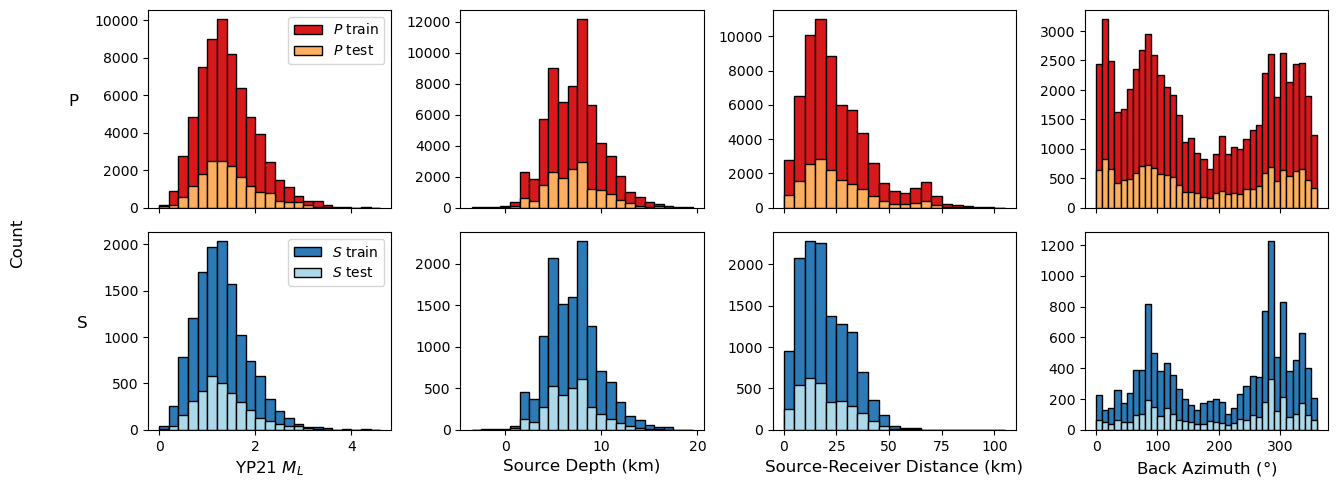

In [6]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", "source_receiver_distance_km", 'source_receiver_back_azimuth']
col_bins = [np.arange(0, 4.7, 0.2), np.arange(-3.5, 20, 1), np.arange(0, 110, 5), np.arange(0, 370, 10)]
xlabels = ["YP21 $M_L$", "Source Depth (km)",'Source-Receiver Distance (km)', 'Back Azimuth $(\degree)$']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels)

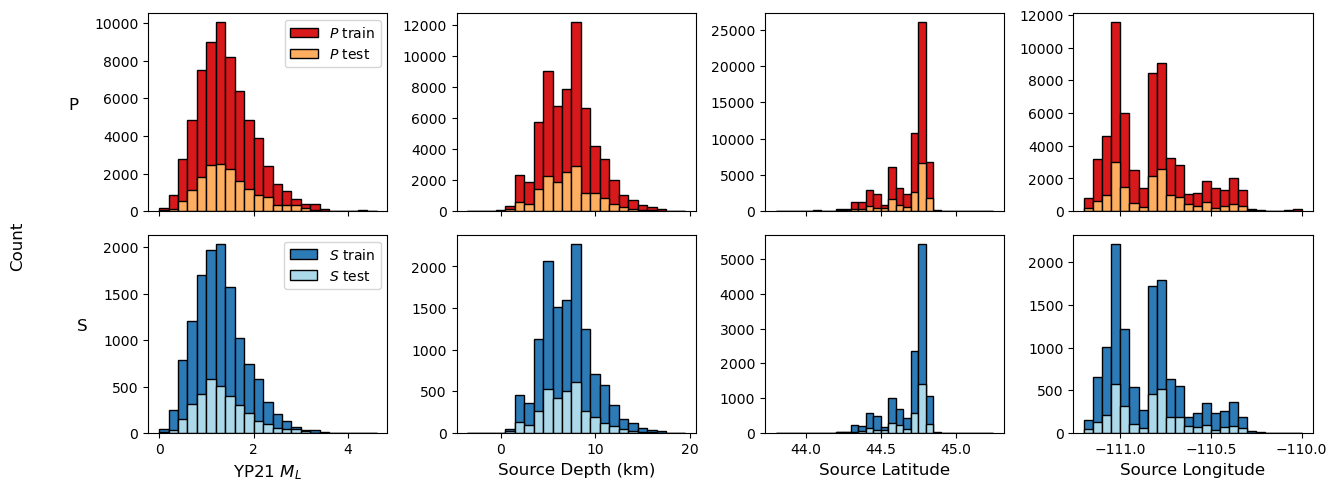

In [7]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", 'source_latitude', "source_longitude"]
col_bins = [np.arange(0, 4.7, 0.2), np.arange(-3.5, 20, 1), np.arange(43.8, 45.3, 0.05), np.arange(-111.2, -110, 0.05)]
xlabels = ["YP21 $M_L$", "Source Depth (km)",'Source Latitude', 'Source Longitude']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels, rotate_xlabels=False)

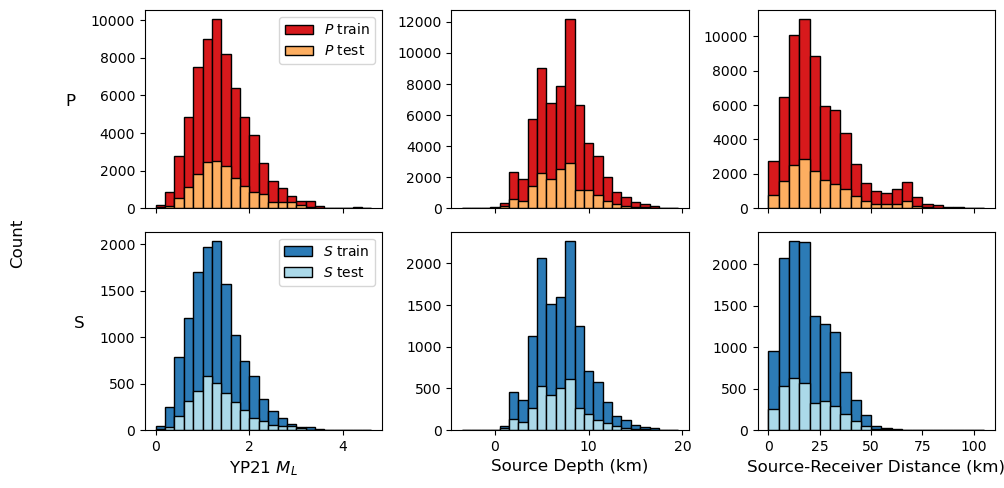

In [8]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", "source_receiver_distance_km"]
col_bins = [np.arange(0, 4.7, 0.2), np.arange(-3.5, 20, 1), np.arange(0, 110, 5)]
xlabels = ["YP21 $M_L$", "Source Depth (km)",'Source-Receiver Distance (km)']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels)